Written by Nikolas Klemola Tango / CSC - IT Center for Science Ltd.
***

# Nobel prize experiment: Bell tests

In a 1935 paper, Albert Einstein, Boris Podolsky, and Nathan Rosen argued that the quantum mechanical description of reality was fundamentally incomplete as it did not meet the requirements to properly describe 'elements of reality'. They proposed, that for two entangled particles separated by an arbitrary distance, the act of measuring one would instantaneously collapse the state of the other and, as such, violate locality, the principle that interactions cannot propagate faster than light. Clearly, there were missing components to quantum theory, termed 'hidden variables', that should explain this apparent contradiction $^{[1]}$. This came to be known as the EPR paradox.

30 years later, John Stewart Bell contested this view by showing that independent measurements following local hidden variables led to certain constraints for measurement outcomes, which came to be known as the Bell inequality. Furthermore, Bell showed that quantum physics predicts certain outcomes that violate this inequality, and thus local hidden variable theories do not agree with quantum mechanics $^{[2]}$. This fact was first experimentally verified in 1972 $^{[3]}$ and has been performed many times since. In fact, the 2022 Nobel Prize for physics was awarded to Alain Aspect, John Clauser, and Anton Zeilinger in large part for their photonic experiments verifying Bell's reasoning. 

In this notebook, we compute a variation of the Bell tests, known as the CHSH inequality on the Finnish quantum computer, Helmi.

### Imports

In [1]:
import numpy as np
from qiskit import QuantumCircuit, execute
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

## Experiment

### Background

For the experiment, we have two particles, $A$ and $B$, which are separated to two different locations. Then, at the same time, measurements are performed for either of two observables, $A_0$, $A_1$, and $B_0$, $B_1$, for each particle, respectively. Additionally, the values for these observables can only be $\pm 1$.

We can then formulate the following quantity:
$$CHSH1 = A_0B_0 - A_0B_1 + A_1B_0 + A_1B_1 = A_0(B_0 - B_1) + A_1(B_0 + B_1).$$

This quantity is not physically meaningful; in fact, we can formulate other quantities of this form that work equally well for this experiment. Importantly, it is comprised of combined measurements of $A$ and $B$, and it has a convenient bound. Since $B_0$ and $B_1$ can be either $1$ or $-1$, one of the terms must be zero, and since the values for $A_0$ and $A_1$ range similarly, then $$CHSH1 = \pm 2,$$

Here, we employ the theory of local hidden variables, assuming that the values for $A_0, A_1, B_0,$ and $B_1$ can be known simultaneously. This is comprised of two key assumptions:
* Locality: the measurements of $A$ do not affect the measurements of $B$, thus interactions do not propagate faster than light.
* Realism/hidden variables: $A_0, A_1, B_0,$ and $B_1$ correspond to physical properties that exist independently of the action of measurement, which are described by the hidden variables missing in quantum theory.

This leads to the following bound for the expectation value: $$|\left \langle CHSH1 \right \rangle |\leq 2.$$

We also have:

\begin{align*} 
\left \langle CHSH1 \right \rangle = \left \langle A_0B_0 \right \rangle - \left \langle A_0B_1  \right \rangle + \left \langle A_1B_0 \right \rangle + \left \langle A_1B_1 \right \rangle.
\end{align*}

By substituting this into the bound, we get the CHSH inequality:

$$|\left \langle CHSH1 \right \rangle| = |  \left \langle A_0B_0 \right \rangle - \left \langle A_0B_1 \right \rangle  + \left \langle A_1B_0 \right \rangle +  \left \langle A_1B_1 \right \rangle | \leq 2.$$

As previously mentioned, we can formulate multiple quantities of this form that follow similarly, such as

$$|\left \langle CHSH2 \right \rangle| = |  \left \langle A_0B_0 \right \rangle +  \left \langle A_0B_1 \right \rangle  - \left \langle A_1B_0 \right \rangle +  \left \langle A_1B_1 \right \rangle | \leq 2.$$

In the experiment, we will measure $|\left \langle CHSH1 \right \rangle|$ and $|\left \langle CHSH2 \right \rangle|$ with different measurements and see how they relate to the bound we derived for systems that can be described with local hidden variables.

### Initial state

Initially, we prepare two qubits in the singlet state:
$$\left | \Psi^- \right \rangle = \frac{1}{\sqrt(2)}(\left | 01 \right \rangle - \left | 10 \right \rangle).$$

Then, select the measurements $B_0 = Z, B_1 = X$ for the second qubit, where $Z$ and $X$ are the usual Pauli operators. For the first qubit, we select $A_0 = Z, A_1 = X$ and rotate the states of the qubit around the $Y$-axis, which will result in the qubit being measured in a mixture of the $X$ and $Z$ bases. 

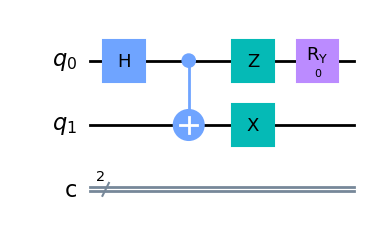

In [12]:
# Circuit to prepare the state
def rotated_bell(theta):
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    qc.x(1)
    qc.z(0)
    qc.ry(theta,0)
    return qc

# Visualization of circuit
qc = rotated_bell(0)
qc.draw('mpl')

### Measurement in $Z, X$ basis

We first find expressions for measurement in the $Z$ and $X$ basis, $\left \langle Z \right \rangle $ and $\left \langle X \right \rangle$, which we can calculate through spectral decomposition:
\begin{align*}
&\langle Z \rangle =\langle \psi | Z | \psi \rangle =\langle \psi |0\rangle\langle 0|\psi\rangle - \langle \psi|1\rangle\langle 1|\psi\rangle
=|\langle 0 |\psi \rangle|^2 - |\langle 1 | \psi \rangle|^2 \\[0.5em]
&\langle X \rangle = \langle \psi|+\rangle\langle +|\psi\rangle - \langle \psi|-\rangle\langle -|\psi\rangle
 =|\langle 0 |H|\psi\rangle|^2 - |\langle 1 |H| \psi\rangle|^2
\end{align*}

The change in basis from $Z$ to $X$ corresponds to applying $H$ before the measurement.

In [3]:
def z_measurement():
    qc = QuantumCircuit(1,1)
    qc.measure(0,0)
    return qc

def x_measurement():
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.measure(0,0)
    return qc

### Measurement in $ZZ, ZX, XZ, XX$ basis

The expressions for $\left \langle ZZ \right \rangle$, $\left \langle ZX \right \rangle$, $\left \langle XZ \right \rangle$, and $\left \langle XX \right \rangle$ follow similarly:

\begin{align*}
&\langle ZZ\rangle =|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2\\[0.5em]
&\langle ZX\rangle =|\langle 0| \langle0|H|\psi\rangle|^2 - |\langle 0| \langle1|H | \psi\rangle|^2 - |\langle 1| \langle0|H | \psi\rangle|^2 + |\langle 1| \langle1|H|\psi\rangle|^2\\[0.5em]
&\langle XZ\rangle =| \langle0|H \langle 0|\psi\rangle|^2 - |\langle0|H \langle 1 | \psi\rangle|^2 - |\langle1|H \langle 0 | \psi\rangle|^2 + |\langle1|H \langle 1|\psi\rangle|^2\\[0.5em]
&\langle XX\rangle =|\langle 0|H  \langle0|H|\psi\rangle|^2 - |\langle 0|H  \langle1|H | \psi\rangle|^2 - |\langle 1|H \langle0|H | \psi\rangle|^2 + |\langle 1|H \langle1|H|\psi\rangle|^2
\end{align*}

In [4]:
zz_measurement = QuantumCircuit(2,2)
zz_measurement.append(z_measurement(),[0],[0])
zz_measurement.append(z_measurement(),[1],[1])

zx_measurement = QuantumCircuit(2,2)
zx_measurement.append(z_measurement(),[0],[0])
zx_measurement.append(x_measurement(),[1],[1])

xz_measurement = QuantumCircuit(2,2)
xz_measurement.append(x_measurement(),[0],[0])
xz_measurement.append(z_measurement(),[1],[1])

xx_measurement = QuantumCircuit(2,2)
xx_measurement.append(x_measurement(),[0],[0])
xx_measurement.append(x_measurement(),[1],[1])

measurement_circuits = [zz_measurement,zx_measurement,xz_measurement,xx_measurement]

### States with varying phase

Now that we have the observables for our experiment, we create circuits that vary the angle of measurement around the $Y$-axis from $0$ to $2\pi$.

In [5]:
number_of_phases = 25
phases = np.linspace(0, 2 * np.pi, number_of_phases)
states = []
for i in phases:
    states.append(rotated_bell(i))

### Connection to quantum computer

It is possible to run this notebook without a LUMI connection to Helmi, in that case one has to comment out the Helmi quantum computer backend and uncomment the Noise-free simulation or the Helmi noise model simulation sections.

In [ ]:
# Imports from IQM Qiskit for Helmi use
from iqm.qiskit_iqm import IQMProvider, IQMFakeAdonis
helmi_url = 'https://qc.vtt.fi/helmi/cocos'
provider = IQMProvider(helmi_url)

### Expectation value

Finally, we compute $\left \langle CHSH1 \right \rangle$ and $\left \langle CHSH2 \right \rangle$ for each of the states with varying measurement angles by:
* Calculating the probability distribution for each of the four observables
* Subtracting the probabilities according to the formulas from the previous section 
* Computing the total quantities $\left \langle CHSH1 \right \rangle$ and $\left \langle CHSH2 \right \rangle$ from the results

In [6]:
# Noise-free simulation:
#backend = AerSimulator()

# Helmi noise model simulation:
#backend = IQMFakeAdonis()

# Helmi quantum computer: (requires LUMI connection, takes ~10min)
backend = provider.get_backend()

shots = 2**11
chsh1 = []
chsh2 = []

# Run each initial state with the four basis measurements
for state_init in states:
    exp_val = []
    for measure_circuit in measurement_circuits:

        # Calculate probability distribution for each combined ciruit
        qc = state_init&measure_circuit
        counts = execute(qc, backend, shots=shots).result().get_counts()

        # Calculate the probabilities for each computational basis
        probs = {}
        for output in ['00','01', '10', '11']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0
            
        #computing expectation values ie. <ZZ> = <00|q>^2 - <01|q>^2 - <10|q>^2 + <11|q>^2
        exp_val.append(probs['00'] - probs['01'] - probs['10'] + probs['11'])
 
    #A_0B_0 - A_0B_1 + A_1B_0 + A_1B_1
    chsh1.append(exp_val[0]-exp_val[1]+exp_val[2]+exp_val[3])
    #A_0B_0 + A_0B_1 - A_1B_0 + A_1B_1
    chsh2.append(exp_val[0]+exp_val[1]-exp_val[2]+exp_val[3])


## Results

In the following graph, the values for $\left \langle CHSH1 \right \rangle$ and $\left \langle CHSH2 \right \rangle$ are plotted as functions of the angle of measurement of qubit 1. Also marked within the graph are the bounds of $\pm 2$, representing the maximum and minimum values explainable by local hidden variables adhering to classical correlations. The area shaded grey denotes the realm of quantum correlations surpassing classical bounds, thus violating the Bell inequality. This region is bounded by the maximal and minimal values for quantum correlations $\pm 2\sqrt{2}$, known as Tsirelson's bound.

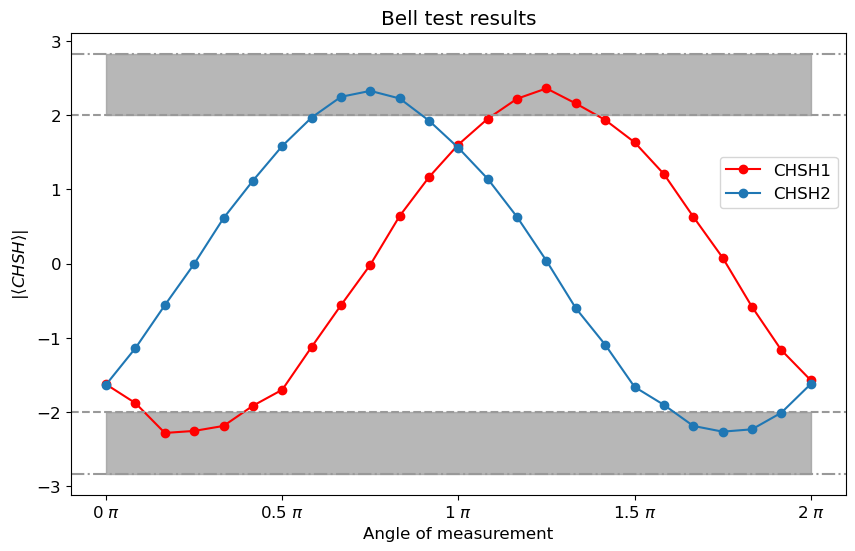

In [62]:
plt.rc('font', size=12) 
fig, ax = plt.subplots(figsize=(10, 6))

# results from hardware
ax.plot(phases/np.pi, chsh1, "o-", label="CHSH1", color = "red", zorder=2)
ax.plot(phases/np.pi, chsh2, "o-", label="CHSH2", zorder=3)

# classical bound +-2
ax.axhline(y=2, color="0.6", linestyle="--")
ax.axhline(y=-2, color="0.6", linestyle="--")

# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.6", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.6", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)

# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

# set labels, and legend
plt.title("Bell test results")
plt.xlabel("Angle of measurement")
plt.ylabel("$|\left \langle CHSH \\right \\rangle|$")
plt.legend(bbox_to_anchor=(1, 0.75))
plt.show()

### Recap

In this experiment,
1) We derived the quantities $ CHSH1 $ and $ CHSH2$ and showed that, with the assumption of local hidden variables, there exist bounds $$|\left \langle CHSH1 \right \rangle|, |\left \langle CHSH2 \right \rangle| \leq 2.$$
2) We evaluated these quantities for two qubits in the singlet state:
$$\left | \Psi^- \right \rangle = \frac{1}{\sqrt(2)}(\left | 01 \right \rangle - \left | 10 \right \rangle).$$
3) For the measurements, we chose $B_0 = Z$ and $B_1 = X$, and we rotated the first qubit along the y-axis such that $A_0$ and $A_1$ were measured in a mixture of the $Z$ and $X$ bases. 
4) Computed the values for $|\left \langle CHSH1 \right \rangle|$ and $|\left \langle CHSH2 \right \rangle|$ for these different measurements on the Helmi quantum computer.
5) Observed that the values for $|\left \langle CHSH1 \right \rangle|$ and $|\left \langle CHSH2 \right \rangle|$ exceed the bounds derived for local hidden variable theories for certain angles of measurement.

In fact, $|\left \langle CHSH1 \right \rangle|$ attains its maximum value with $\theta = \frac{5\pi}{4}$, which equates to measurements of $A_0 = -\frac{Z+X}{\sqrt{2}}$, $A_1 = \frac{Z-X}{\sqrt{2}}$, $B_0 = Z$, and $B_1 = X$, which can also be computed analytically to equal $2\sqrt{2}$ in an ideal system. 

## Conclusion

The results, both theoretical and experimental, show that the behaviour of quantum mechanics cannot be explained by local hidden variables. Furthermore, one or both of the assumptions regarding locality and/or realism must be incorrect. This result is known as Bell's theorem, which shows the clear deviation of quantum mechanics from the intuitive ways in which we understand the world to work. The notion of entanglement also has a key role here, as the state that violates Bell's inequality is maximally entangled. Indeed, the entanglement of states equates to violating Bell's inequality. This highlights the importance of entanglement when it comes to quantum technology and especially quantum information, where entanglement allows us to do something inherently outside of classical possibilities. 

In [8]:
print("Quantum expectation value with theta = 5pi/4: "+ str(chsh1[15]))
print("Classical limit for the expectation value: "+ str(2))

Quantum expectation value with theta = 5pi/4: 2.361328125
Classical limit for the expectation value: 2


### Based on

https://learning.quantum.ibm.com/tutorial/chsh-inequality

### References & Resources
1. Einstein, A.; Podolsky, B.; Rosen, N. (1935-05-15). "Can Quantum-Mechanical Description of Physical Reality be Considered Complete?". Physical Review. 47 (10): 777–780. Bibcode:1935PhRv...47..777E. doi:10.1103/PhysRev.47.777.
2. Bell, J. S. (1964). "On the Einstein Podolsky Rosen Paradox" (PDF). Physics Physique Физика. 1 (3): 195–200.
3. Freedman, Stuart J., and John F. Clauser. “Experimental Test of Local Hidden-Variable Theories.” Physical Review Letters, vol. 28, no. 14, 3 Apr. 1972, pp. 938–941, adsabs.harvard.edu/abs/1972PhRvL..28..938F, https://doi.org/10.1103/physrevlett.28.938.
4. Wolchover, Natalie (2017-02-07). "Experiment Reaffirms Quantum Weirdness". Quanta Magazine. Retrieved 2020-02-08.
5. Nielsen, Michael A.; Chuang, Isaac L. (2010). Quantum Computation and Quantum Information (2nd ed.). Cambridge: Cambridge University Press. ISBN 978-1-107-00217-3. OCLC 844974180.
6. Bell, John S. (1987). Speakable and Unspeakable in Quantum Mechanics. Cambridge University Press. p. 65. ISBN 9780521368698. OCLC 15053677.
7. http://theory.caltech.edu/~preskill/ph219/index.html#lecture
8. https://qubit.guide/6.3-chsh-inequality